#Un modello di previsione per il mercato immobiliare

RealEstateAI Solutions si propone di ottimizzare la valutazione dei prezzi immobiliari attraverso l'uso di tecniche avanzate di regolarizzazione in modelli di regressione lineare. L'obiettivo è fornire previsioni di prezzo più accurate e affidabili, riducendo il rischio di overfitting e migliorando la capacità di generalizzazione del modello.

Nel settore immobiliare, ottenere stime precise dei prezzi delle proprietà è cruciale per prendere decisioni informate. Tuttavia, i modelli di regressione lineare tradizionali possono soffrire di overfitting, compromettendo l'accuratezza delle previsioni. È necessario esplorare metodi di regolarizzazione efficaci per migliorare le performance predittive e gestire la complessità del modello.

Implementando e confrontando metodi di regolarizzazione come Lasso, Ridge e Elastic Net, RealEstateAI Solutions offrirà un sistema in grado di fornire previsioni di prezzo immobiliari più accurate e stabili. Questo permetterà agli agenti immobiliari e agli investitori di prendere decisioni basate su dati più affidabili, aumentando la loro competitività nel mercato.

**Requisiti del Progetto:**

1. **Preparazione del Dataset:**
* Caricamento e preprocessamento dei dati sui prezzi immobiliari.
* Gestione dei valori mancanti, codifica delle variabili categoriche e normalizzazione/scalatura dei dati.

2. **Caricamento e preprocessamento dei dati sui prezzi immobiliari.**
* Ridge Regression: Implementazione e addestramento del modello con regolarizzazione Ridge.
* Lasso Regression: Implementazione e addestramento del modello con regolarizzazione Lasso.
* Elastic Net Regression: Implementazione e addestramento del modello con regolarizzazione Elastic Net.

3. **Valutazione delle Performance:**
* Utilizzo di tecniche di validazione incrociata.
* Calcolo del Mean Squared Error (MSE) per ciascun modello.
* Confronto della complessità dei modelli valutando il numero di coefficienti non nulli.
* Analisi e confronto dei risultati dei vari metodi di regolarizzazione.

4. **Visualizzazione dei Risultati**
* Creazione di grafici per visualizzare e confrontare le performance dei modelli.
* Visualizzazione della distribuzione dei residui per valutare l'adeguatezza del modello.
* Visualizzazione dell'andamento dei coefficienti dei modelli rispetto ai parametri di regolarizzazione.

Il progetto deve includere il codice sorgente completo, con commenti dettagliati che spiegano i vari passaggi, le scelte fatte e i risultati ottenuti, per garantire trasparenza e replicabilità del lavoro.

# Il dataset

Il dataset è disponibile qui: https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv (liberamente tratto dal seguente dataset: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

* Price: il prezzo, il target da prevedere
* Area: superficie dell’immobile
* Bedrooms: numero di camere da letto
* Bathrooms: numero di bagni
* Stories: numero di piani
* Mainroad: vale 1 se l’immobile affaccia su una strada principale, 0 altrimenti
* guestroom: vale 1 se l’immobile ha una stanza degli ospiti, 0 altrimenti
* basement: vale 1 se l’immobile ha un seminterrato, 0 altrimenti
* hotwaterheating: vale 1 se l’immobile ha una caldaia, 0 altrimenti
* airconditioning: vale 1 se l’immobile ha l’aria condizionata, 0 altrimenti
* parking: numero di parcheggi
* prefarea: vale 1 se l’immobile è in una zona prestigiosa, 0 altrimenti
* Furnishingstatus: vale 0 se l’immobile non è arredato, 1 se è parzialmente arredato, 2 se è completamente arredato






In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing


In [ ]:
DATASET_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv"

In [ ]:
# Lettura del dataset

df = pd.read_csv(DATASET_URL)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [ ]:
# Stampa delle numeriche che compongono il dataset (samples e features)

df.shape

(545, 13)

In [ ]:
# verifica dei dati

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [ ]:
print(df.isna().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


**Osservazioni** <br>
Il dataset è composto da 545 osservazioni (samples), ognuna delle quali ha 13 variabili (features).

Tutte le features sono numeriche e nessun sample ha features nulle.<br>
Non è quindi necessario intervenire con attività di bonifica del dataset. <br>

Non sono presenti features non influenti "per natura" rispetto al target (es. codici identificativi). <br>

## Matrice di correlazione

Per sondare la bontà e l'utilità di tutte le feature, è opportuno effettuare una prima analisi della correlazione lineare tra le feature e verso la variabile target.

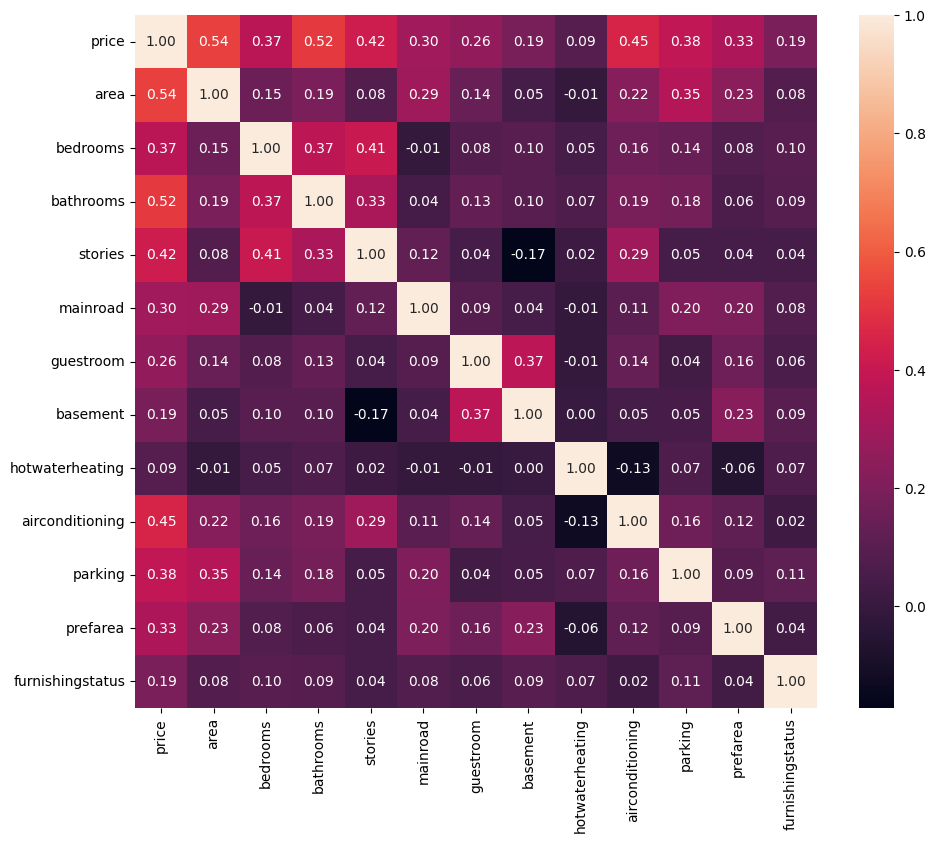

In [ ]:
# Visualizzazione della matrice di correlazione

plt.figure(figsize=(11, 9))
sns.heatmap(df.corr(),fmt=".2f",annot=True)
plt.show()

In [ ]:
# Elenco della correlazione tra ogni feature

# Calcolo della matrice di correlazione tra features (fatta eccezione per la variabile target)
corr_matrix = df.drop(columns=["price"]).corr()

# Maschera per prendere solo i valori sotto la diagonale
mask = np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool)

# Applica la maschera per ottenere solo le correlazioni sotto la diagonale
corr_pairs = corr_matrix.where(mask).stack()

# Ordina le correlazioni in valore assoluto
sorted_corr = corr_pairs.abs().sort_values(ascending=False)

# Visualizza l'elenco ordinato delle correlazioni
print(sorted_corr)

stories          bedrooms     0.408564
bathrooms        bedrooms     0.373930
basement         guestroom    0.372066
parking          area         0.352980
stories          bathrooms    0.326165
                                ...   
mainroad         bedrooms     0.012033
hotwaterheating  mainroad     0.011781
                 guestroom    0.010308
                 area         0.009229
                 basement     0.004385
Length: 66, dtype: float64


In [ ]:
# Elenco della correlazione di ogni feature con la variabile target

# Calcola la matrice di correlazione
corr_matrix = df.corr()

# Estrai le correlazioni con la variabile target
target_corr = corr_matrix['price'].drop('price')  # Rimuovi la correlazione con se stessa

# Ordina le correlazioni (in valore assoluto) in ordine decrescente
sorted_target_corr = target_corr.apply(lambda x: abs(x)).sort_values(ascending=False)
print(sorted_target_corr)

# Trova la variabile con la correlazione più alta con target
highest_corr_variable = sorted_target_corr.idxmax()
highest_corr_value = sorted_target_corr.max()

area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
furnishingstatus    0.190086
basement            0.187057
hotwaterheating     0.093073
Name: price, dtype: float64


Le features non sembrano essere fortemente correlate tra loro e ogni feature sembra essere in correlazione con la variabile target. <br>
L'unica eccezione riguarda la variabile "hotwaterheating". <br>
Provando a rimuoverla i risultati sono leggermente peggiorati per alcuni modelli e leggermente migliorati per altri modelli. <br>

L'impatto non è stato tale da giustificare la rimozione della variabile del dataset e si procederà quindi a calcolare i modelli sull'intero dataset. <br>

In base alle necessità, è comunque procedere alla bonifica delle feature per proseguire con l'esplorazione dei modelli.

In [ ]:
# Imposto il random seed a 0 in modo da rendere riproducibili gli esperimenti e testare le modifiche alle configurazioni

RANDOM_SEED=0

In [ ]:
# Trasformazione del dataframe in array numpy

X = df.drop(columns=["price"]).values

# (Test di rimozione features meno correlate con la variabiel target o troppo correlate con altre features)
#X = df.drop(columns=["price","hotwaterheating"]).values

y = df[["price"]].values

In [ ]:
# Split i dati in training e test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=RANDOM_SEED)

## Modello Polinomiale

I primi test sono stati effettuati senza trasformare il modello in un modello polinomiale, ma i risultati non sono stati soddisfacienti. <br>

Pertanto si è deciso di applicare la trasformazione polinomiale in modo da migliorare le metriche a discapito di una maggior complessità del modello.

In [ ]:
# Instanziazione modello polinomiale

poly=PolynomialFeatures(2)

In [ ]:
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)

## Scaling

Per decidere se procedere con la Normalizzazione e Standardizzazione delle features, si analizzerà la distribuzione di ogni feature

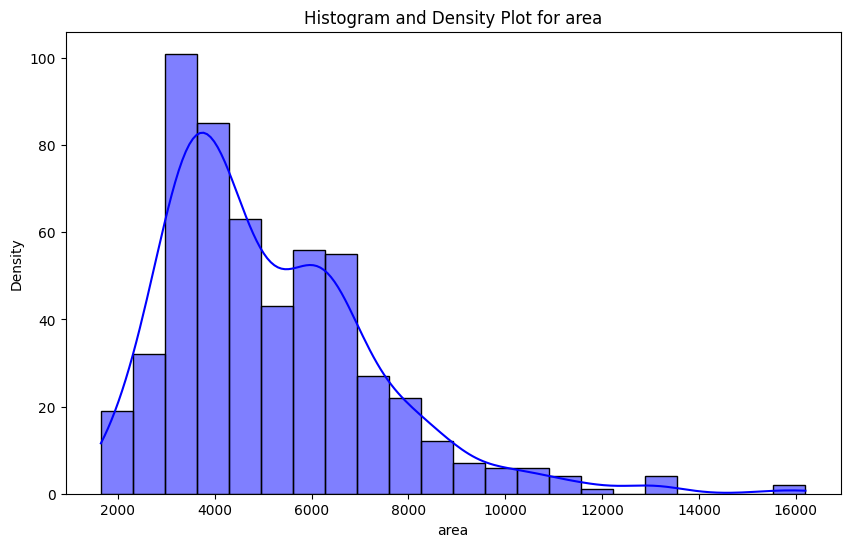

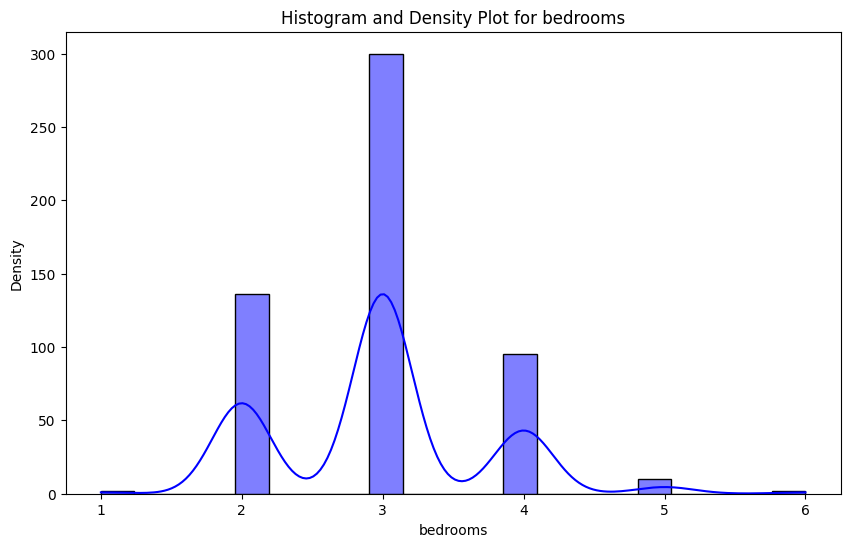

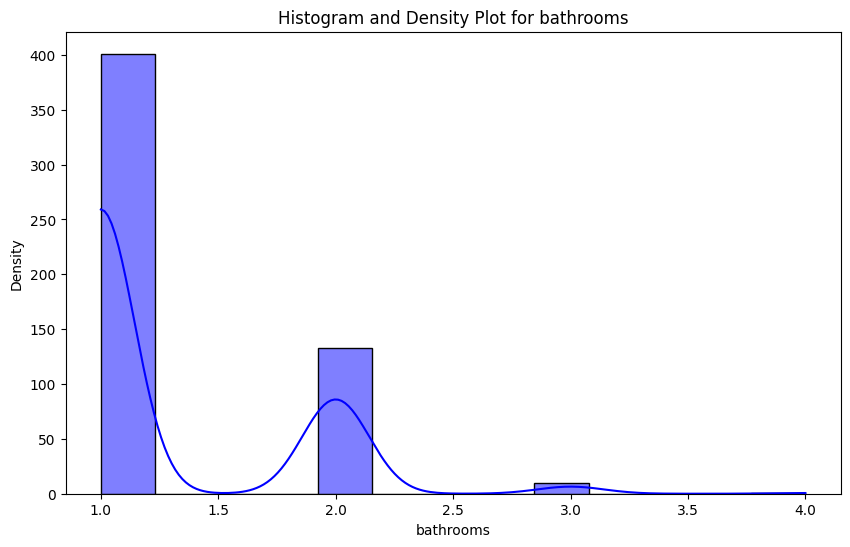

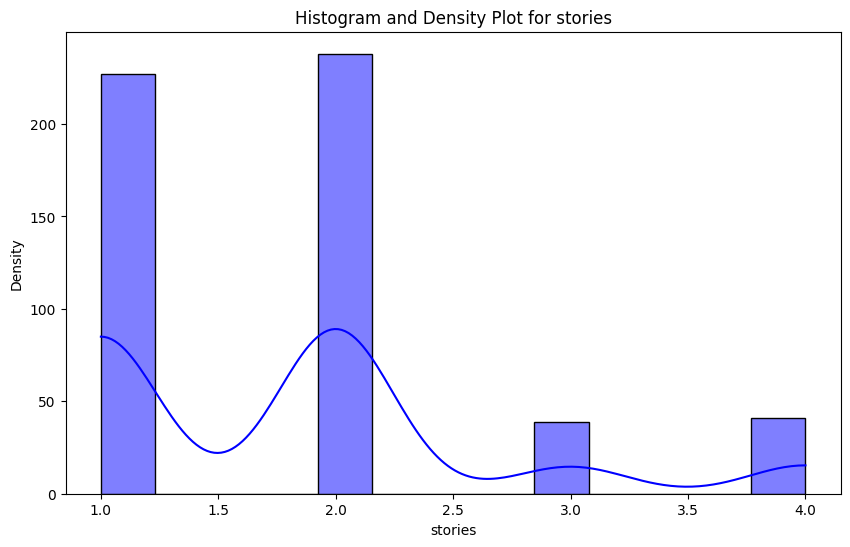

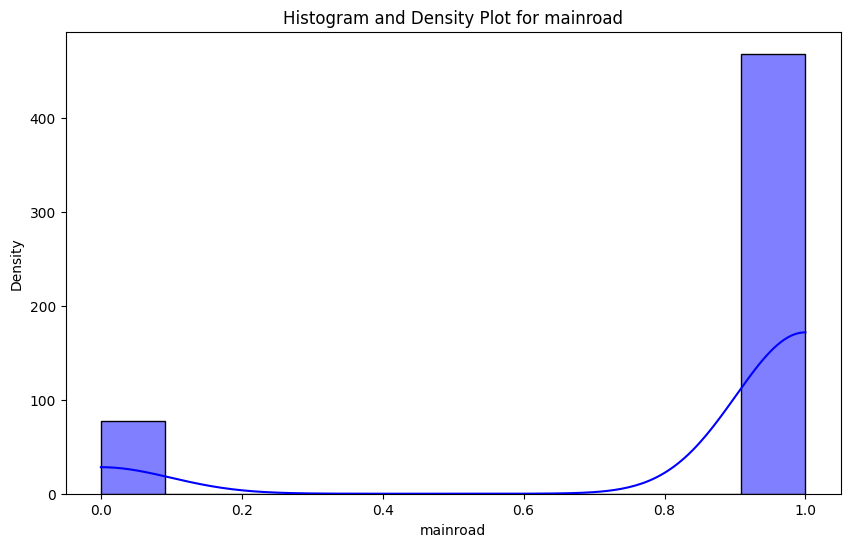

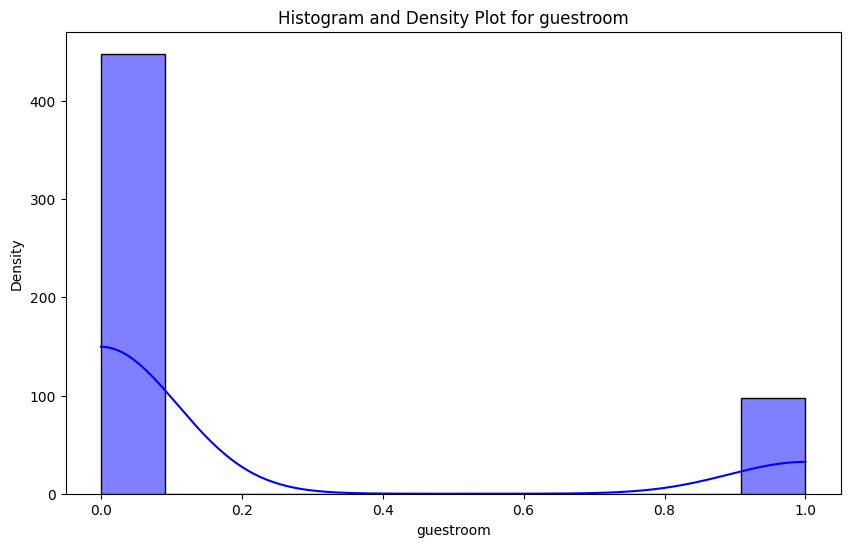

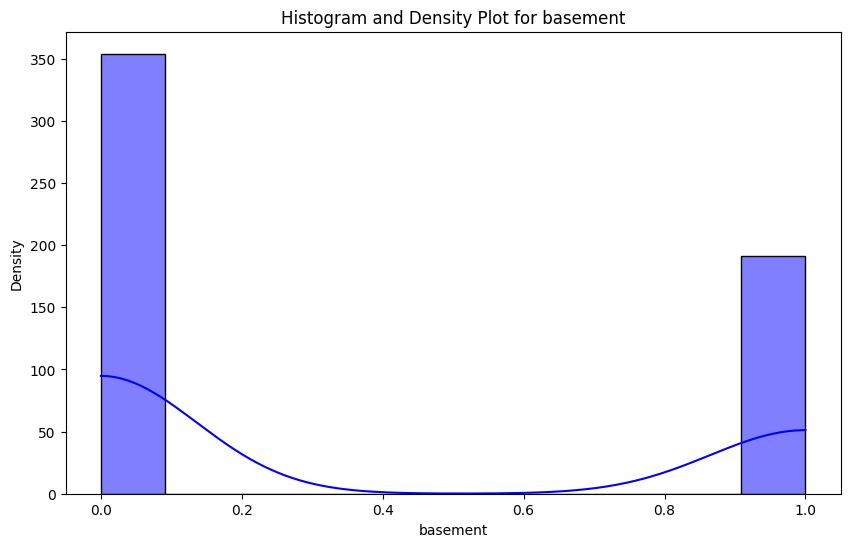

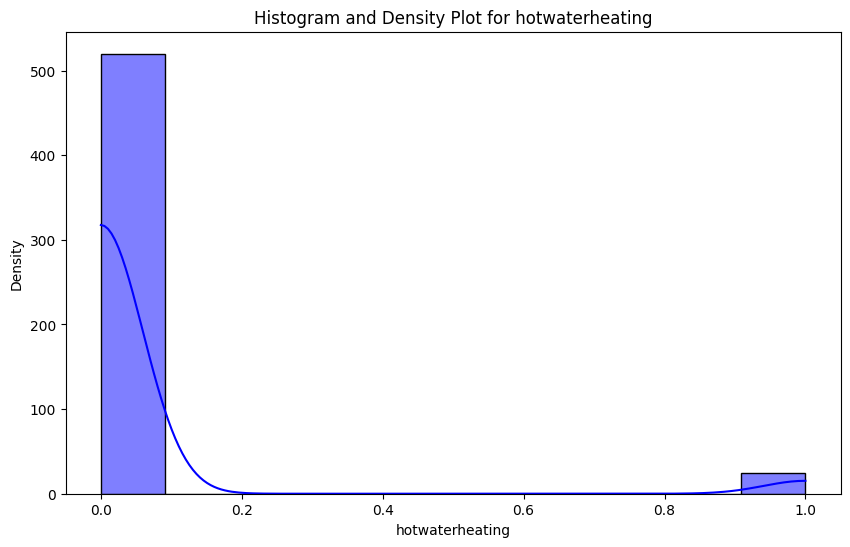

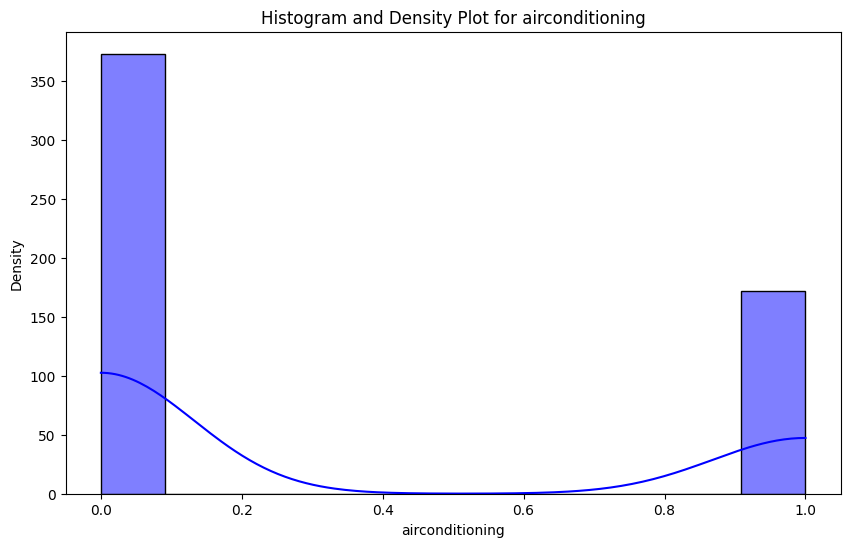

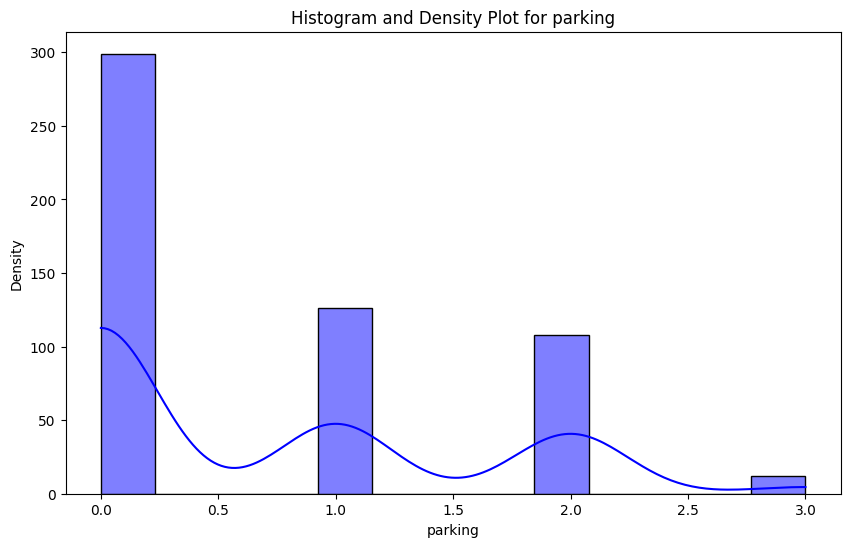

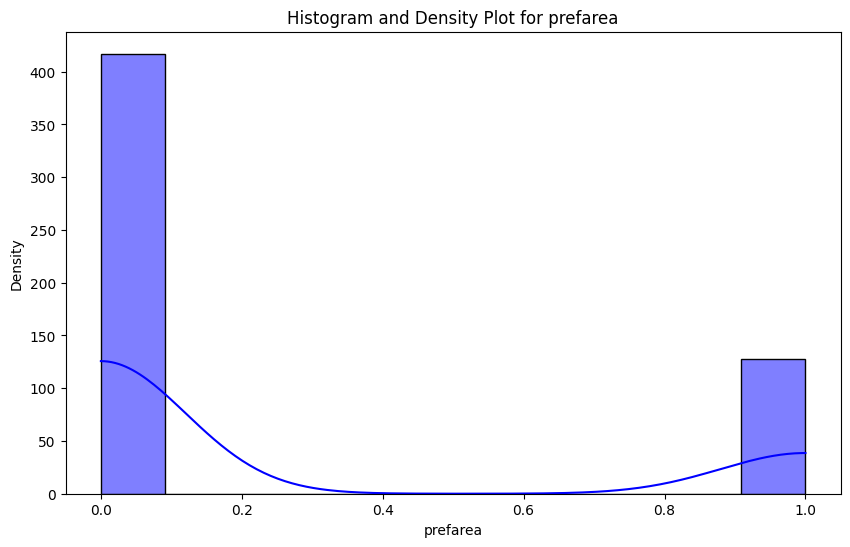

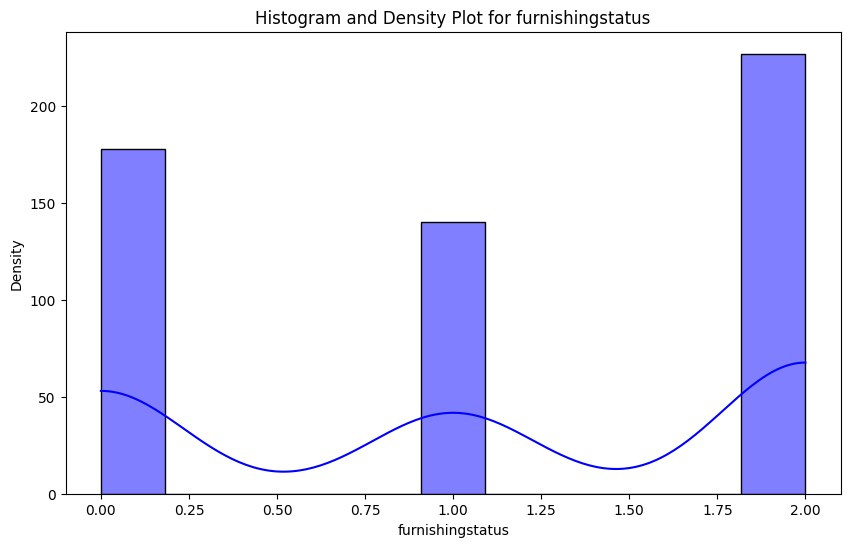

In [ ]:
# Crea un istogramma con curva di densità per ogni feature

for column in df.drop(columns=["price"]).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f'Histogram and Density Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

Procederemo prima allo scaling tramite standardizzazione, dato che la variabile "area" (la più correlata alla variabile target) e le altra variabili continue seguono una distribuzione gaussiana. <br>

Tra i commenti sono state mantenute le altre modalità di scaling in modo da rendere agevole eventuali esperimenti.

In [ ]:
# Normalizzazione

def normalize(X_train, X_test):

  X_train_norm=X_train

  mms=MinMaxScaler()
  X_train_norm=mms.fit_transform(X_train_norm)
  X_test_norm=mms.transform(X_test)

  return(X_train_norm,X_test_norm)

In [ ]:
# Standardizzazione

def standardize(X_train, X_test):

  X_train_std=X_train

  ss=StandardScaler()
  X_train_std=ss.fit_transform(X_train_std)
  X_test_std=ss.transform(X_test)
  return(X_train_std,X_test_std)

In [ ]:
# Standardizzazione
X_train_scaled,X_test_scaled = standardize(X_train, X_test)

# Normalizzazione
#X_train_scaled,X_test_scaled = normalize(X_train, X_test)

# Dati originali
#X_train_scaled,X_test_scaled = X_train,X_test

In [ ]:
# Ricostruisco il dataset trasformato
X_scaled = np.vstack((X_train_scaled, X_test_scaled))

## Funzioni per la valutazione del modello

In [ ]:
ridge_coefs=[]
lasso_coefs=[]
elastic_coefs=[]

alpha_values=[0.00001,0.0001,0.001,0.01,1,10,
              100,200,300,400,500,600,700,800,900,1000,
              35000,35100
            ]

In [ ]:
# Funzione per valutare il modello

def evaluate_model(model,dataset,do_print):

  _X,_y=dataset
  _y_pred=model.predict(_X)
  r2=r2_score(_y,_y_pred)
  mse=mean_squared_error(_y,_y_pred)
  if do_print:
    print(f"R2: {r2:.3f}")
    print(f"MSE: {mse:.3f}")

  residuals = _y - _y_pred

  return (r2,mse,residuals.flatten())

In [ ]:
# Funzione per trovare le soglie migliori degli hyperparameters usando lo split in Train - Test

RIDGE = 0
LASSO = 1
ELASTIC_NET=2

def find_hyperparameters(model_code,train_data,test_data):

  best_i=0
  best_j=0
  best_r2=0

  _X_train,_y_train=train_data
  _X_test,_y_test=test_data

  for i in alpha_values:
    max_range=1

    if model_code==2:
      max_range=11

    for j in range(0,max_range):
      _i=i
      _j=j/10

      if model_code==RIDGE:
        model=Ridge(
            alpha=_i
          )
      elif model_code==LASSO:
        model=Lasso(
            alpha=_i
          )
      else:
        model=ElasticNet(
            alpha=_i,
            l1_ratio=_j
          )

      model.fit(_X_train,_y_train)

      if model_code==RIDGE:
        ridge_coefs.append(model.coef_.flatten())
      elif model_code==LASSO:
        lasso_coefs.append(model.coef_.flatten())
      else:
        elastic_coefs.append(model.coef_.flatten())

      r2_train=evaluate_model(model,(_X_train,_y_train),False)[0]

      r2_test=evaluate_model(model,(_X_test,_y_test),False)[0]

      if round(r2_test,3) > round(best_r2,3):
        best_i=_i
        best_j=_j
        best_r2=r2_test

  if model_code==ELASTIC_NET:
    print(f"Best config: alpha {best_i}, l1_ratio {best_j}")
  else:
    print(f"Best config: alpha {best_i}")

  return (best_i,best_j)

In [ ]:
# Funzione per stampare complessità di un modello

def print_model_complessity(coefficients):

  num_null_coefficients = np.sum(coefficients == 0)

  print(f"Numero di coefficienti nulli: {num_null_coefficients} su un totale di {len(coefficients)} coefficienti.")

In [ ]:
# Funzione per trovare le soglie migliori degli hyperparameters usando Cross Validation

def get_r2_from_cross_validation(kf,model,X,y):
  train_score=[]
  test_score=[]

  for train_index,test_index in kf.split(X):
    cross_X_train, cross_X_test=X[train_index],X[test_index]
    cross_y_train, cross_y_test=y[train_index],y[test_index]

    poly=PolynomialFeatures(2)
    poly.fit(cross_X_train)

    cross_X_train=poly.fit_transform(cross_X_train)
    cross_X_test=poly.transform(cross_X_test)

    ss= StandardScaler()
    cross_X_train=ss.fit_transform(cross_X_train)
    cross_X_test=ss.transform(cross_X_test)

    model.fit(cross_X_train,cross_y_train)

    r2_train=r2_score(cross_y_train,model.predict(cross_X_train))
    r2_test=r2_score(cross_y_test,model.predict(cross_X_test))

    train_score.append(r2_train)
    test_score.append(r2_test)

  scores= {
        "train_score" : np.array(train_score),
        "test_score" : np.array(test_score)
  }

  return scores["train_score"].mean(),scores["test_score"].mean()

In [ ]:
RIDGE = 0
LASSO = 1
ELASTIC_NET=2

def find_hyperparameters_from_cross_validation(model_code,X,y):

  best_i=0
  best_j=0
  best_r2=0

  kf= KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)


  for i in alpha_values:
    max_range=1

    if model_code==2:
      max_range=11

    for j in range(0,max_range):
      _i=i
      _j=j/10

      if model_code==RIDGE:
        model=Ridge(
            alpha=_i
          )
      elif model_code==LASSO:
        model=Lasso(
            alpha=_i
          )
      else:
        model=ElasticNet(
            alpha=_i,
            l1_ratio=_j
          )

      r2_training,r2_test=get_r2_from_cross_validation(kf,model,X,y)

      if round(r2_test,3) > round(best_r2,3):
        best_i=_i
        best_j=_j
        best_r2=r2_test

  if model_code==ELASTIC_NET:
    print(f"Best config: alpha {best_i}, l1_ratio {best_j}")
  else:
    print(f"Best config: alpha {best_i}")

  return (best_i,best_j)

In [ ]:
# RIDGE
best_alpha_ridge_cross=find_hyperparameters_from_cross_validation(RIDGE,X,y)[0]

Best config: alpha 200


In [ ]:
# LASSO
best_alpha_lasso_cross=find_hyperparameters_from_cross_validation(LASSO,X,y)[0]

Best config: alpha 35000


In [ ]:
# ELASTIC NET
best_alpha_elastic_cross,best_l1_elastic_cross=find_hyperparameters_from_cross_validation(ELASTIC_NET,X,y)

Best config: alpha 1, l1_ratio 0.2


## Ridge Regression (L2)

In [ ]:
best_alpha=find_hyperparameters(RIDGE,(X_train_scaled,y_train),(X_test_scaled,y_test))[0]
best_alpha_ridge=best_alpha

Best config: alpha 200


In [ ]:
model=Ridge(
    alpha=best_alpha_ridge
  )
model.fit(X_train_scaled,y_train)

Ridge(alpha=200)

In [ ]:
print_model_complessity(model.coef_.flatten())

Numero di coefficienti nulli: 2 su un totale di 91 coefficienti.


In [ ]:
e=evaluate_model(model,(X_train_scaled,y_train),True)

R2: 0.703
MSE: 1039445796924.008


**Risultati Train** <br>

Polynomial(2), No Scaling <br>
R2: 0.695 <br>
MSE: 1067708761083.710 <br>

Polynomial(2), Std, alpha=200 <br>
R2: 0.703 <br>
MSE: 1039445796924.008 <br>

Polynomial(2), Std, alpha=200, Removing Features <br>
R2: 0.676 <br>
MSE: 1135148430078.191 <br>

In [ ]:
ridge_residuals=evaluate_model(model,(X_test_scaled,y_test),True)[2]

R2: 0.749
MSE: 871375064446.326


**Risultati Test**

Polynomial(2), No Scaling <br>
R2: 0.740  <br>
MSE: 901863964562.060  <br>

Polynomial(2), Std, alpha=200  <br>
R2: 0.749  <br>
MSE: 871375064446.326  <br>

Polynomial(2), Std, alpha=200, Removing Features  <br>
R2: 0.761  <br>
MSE: 829311276118.540  <br>

## Lasso Regression (L1)

In [ ]:
best_alpha=find_hyperparameters(LASSO,(X_train_scaled,y_train),(X_test_scaled,y_test))[0]
best_alpha_lasso=best_alpha

Best config: alpha 35000


In [ ]:
model=Lasso(
    alpha=best_alpha_lasso
  )
model.fit(X_train_scaled,y_train)

Lasso(alpha=35000)

In [ ]:
print_model_complessity(model.coef_)

Numero di coefficienti nulli: 65 su un totale di 91 coefficienti.


In [ ]:
e = evaluate_model(model,(X_train_scaled,y_train),True)

R2: 0.712
MSE: 1008439059234.381


**Risultati Train**

Polynomial(2), No Scaling <br>
R2: 0.685 <br>
MSE: 1104357974587.755 <br>

Polynomial(2), Std, alpha=35000 <br>
R2: 0.712 <br>
MSE: 1008439059234.381 <br>

Polynomial(2), Std, alpha=35000, Removing Features <br>
R2: 0.683 <br>
MSE: 1111318035996.018 <br>

In [ ]:
lasso_residuals=evaluate_model(model,(X_test_scaled,y_test),True)[2]

R2: 0.735
MSE: 918814624134.161


**Risultati Test**

Polynomial(2), No Scaling <br>
R2: 0.735 <br>
MSE: 918963908396.777 <br>

Polynomial(2), Std, alpha=35000 <br>
R2: 0.735 <br>
MSE: 918814624134.161 <br>

Polynomial(2), Std, alpha=35000, Removing Features <br>
R2: 0.741 <br>
MSE: 898344163566.095 <br>

## Elastic Net Regression (L1 e L2)

In [ ]:
best_alpha,best_l1=find_hyperparameters(ELASTIC_NET,(X_train_scaled,y_train),(X_test_scaled,y_test))
best_alpha_elastic, best_l1_elastic=best_alpha,best_l1

Best config: alpha 1, l1_ratio 0.0


Best parameters: {'elasticnet__alpha': 500, 'elasticnet__l1_ratio': 0.9, 'poly__degree': 2}
Best R2 on test set: 0.7186198695434004

In [ ]:
model=ElasticNet(
    alpha=best_alpha_elastic,
    l1_ratio=best_l1_elastic
  )
model.fit(X_train_scaled,y_train)

ElasticNet(alpha=1, l1_ratio=0.0)

In [ ]:
print_model_complessity(model.coef_)

Numero di coefficienti nulli: 2 su un totale di 91 coefficienti.


In [ ]:
e = evaluate_model(model,(X_train_scaled,y_train),True)

R2: 0.689
MSE: 1087664178671.663


**Risultati Train**

Polynomial(2), No Scaling <br>
R2: 0.692 <br>
MSE: 1080008033584.948 <br>

Polynomial(2), Std <br>
R2: 0.689 <br>
MSE: 1087664178671.663 <br>

Polynomial(2), Std, Removing Features <br>
R2: 0.671 <br>
MSE: 1153715831339.378 <br>

In [ ]:
elastic_residuals=evaluate_model(model,(X_test_scaled,y_test),True)[2]

R2: 0.749
MSE: 870803504852.665


**Risultati Test**

Polynomial(2), No Scaling <br>
R2: 0.740 <br>
MSE: 903305615956.736 <br>

Polynomial(2), Std <br>
R2: 0.749 <br>
MSE: 870803504852.665 <br>

Polynomial(2), Std, Removing Features <br>
R2: 0.761 <br>
MSE: 830203444660.942 <br>

## Valutazione e Risultati

### Cross Validation

In [ ]:
kf= KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

In [ ]:
# Funzione per computare le performance del modello tramite cross validation

def compute_cross_validation(model,X,y):
  train_score=[]
  test_score=[]

  for train_index,test_index in kf.split(X):
    cross_X_train, cross_X_test=X[train_index],X[test_index]
    cross_y_train, cross_y_test=y[train_index],y[test_index]

    poly=PolynomialFeatures(2)
    poly.fit(cross_X_train)

    cross_X_train=poly.fit_transform(cross_X_train)
    cross_X_test=poly.transform(cross_X_test)

    ss= StandardScaler()
    cross_X_train=ss.fit_transform(cross_X_train)
    cross_X_test=ss.transform(cross_X_test)

    model.fit(cross_X_train,cross_y_train)

    r2_train=r2_score(cross_y_train,model.predict(cross_X_train))
    r2_test=r2_score(cross_y_test,model.predict(cross_X_test))

    train_score.append(r2_train)
    test_score.append(r2_test)

  scores= {
        "train_score" : np.array(train_score),
        "test_score" : np.array(test_score)
  }

  return scores

### Learning Curve

In [ ]:
# Funzione standard per definire e disegnare la learning curve

from sklearn.pipeline import Pipeline

def compute_and_draw_learning_curve(model):

  train_size_abs,train_scores,test_scores=learning_curve(
    model,
    X_scaled,
    y,
    cv=5,
    scoring='r2',
    random_state=RANDOM_SEED
  )
  plt.plot(train_size_abs,train_scores.mean(axis=1),label="Train score")
  plt.plot(train_size_abs,test_scores.mean(axis=1),label="Test score")
  plt.legend()
  plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label="Y = 1", alpha=0.2)
  plt.show()

# In questo scenario sono state applicate diverse trasformazioni sul dataset, per tanto disegnare la learning curve
# usando la funzione standard non produrrebbe risultati attendibili.


### Distribuzione dei residui

In [ ]:
# Funzione per disegnare la distribuzione dei residui

def draw_residual(residuals,_y_pred):

  plt.figure(figsize=(10, 6))
  sns.histplot(residuals, kde=True, color='blue')
  plt.title('Distribuzione dei Residui')
  plt.xlabel('Residui')
  plt.ylabel('Frequenza')
  plt.axvline(0, color='red', linestyle='--')
  plt.show()

  plt.figure(figsize=(10, 6))
  plt.scatter(_y_pred, residuals, color='blue', edgecolors='k')
  plt.axhline(0, color='red', linestyle='--')
  plt.title('Residui vs Valori Predetti')
  plt.xlabel('Valori Predetti')
  plt.ylabel('Residui')
  plt.show()

### Visualizzazione coefficienti

In [ ]:
# Funzione per visualizzare l'andamento dei coefficienti

def draw_coef(coefs):

  coefs=np.array(coefs)
  plt.figure(figsize=(12, 6))
  for i in range(coefs.shape[1]):
      plt.plot(alpha_values, coefs[:, i], label=f'Feature {i}')
  plt.xscale('log')
  plt.xlabel('Alpha')
  plt.ylabel('Coefficient Value')
  plt.title('Model Coefficients')


### Valutazione Modelli

#### RIDGE

In [ ]:
# RIDGE
model=Ridge(
    alpha=best_alpha_ridge
  )
scores=compute_cross_validation(model,X,y)

In [ ]:
scores["train_score"].mean()

0.7266450880470832

**Risultati Train**

Polynomial(2), No Scaling <br>
0.7210822691958363 <br>

Polynomial(2), Std <br>
0.7266450880470832 <br>

Polynomial(2), Std, Removing Features <br>
0.7063642157293897<br>

In [ ]:
scores["test_score"].mean()

0.6708954763041831

**Risultati Test**

Polynomial(2), No Scaling <br>
0.6605405484335891 <br>

Polynomial(2), Std <br>
0.6708954763041831 <br>

Polynomial(2), Std, Removing Features <br>
0.6657276180339153 <br>

In [ ]:
#compute_and_draw_learning_curve(model)

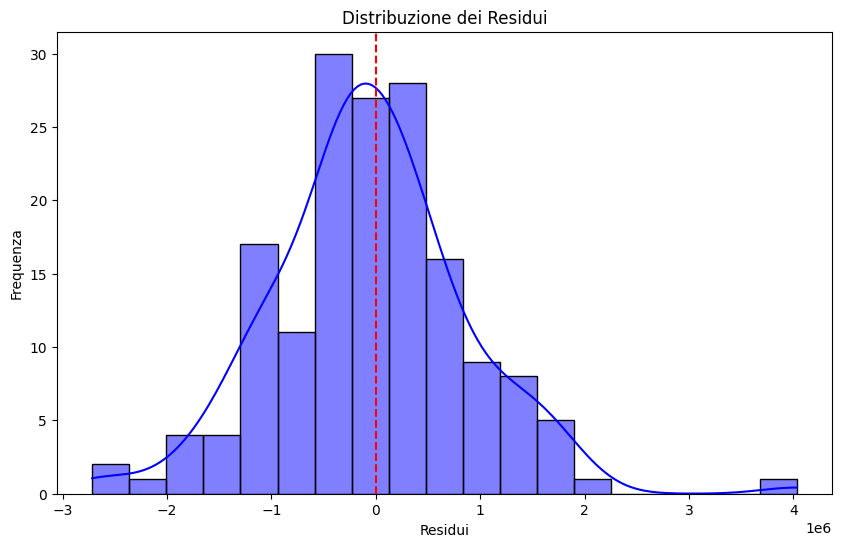

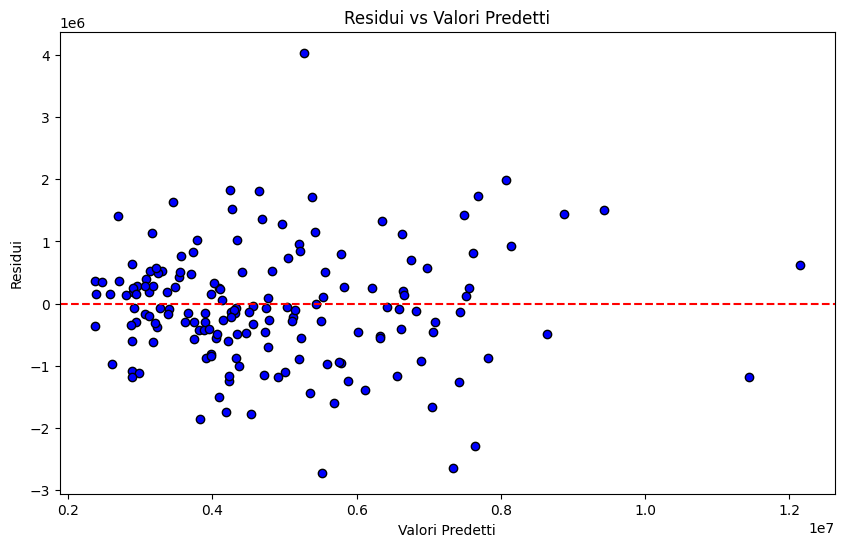

In [ ]:
y_test_pred=model.predict(X_test_scaled)

draw_residual(ridge_residuals,y_test_pred)

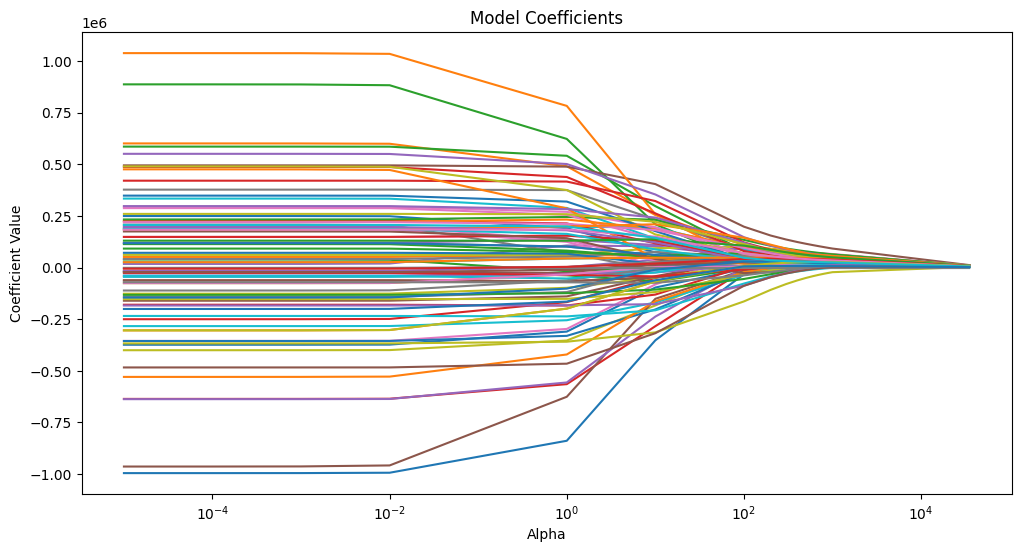

In [ ]:
draw_coef(ridge_coefs)

#### LASSO

In [ ]:
# LASSO
model=Lasso(
    alpha=best_alpha_lasso
  )
scores=compute_cross_validation(model,X,y)

In [ ]:
scores["train_score"].mean()

0.7289449246049207

**Risultati Train**

Polynomial(2), No Scaling <br>
0.7120223631840427 <br>

Polynomial(2), Std <br>
0.7289449246049207 <br>

Polynomial(2), Std, Removing Features <br>
0.7088150236435119 <br>

In [ ]:
scores["test_score"].mean()

0.6590817072009731

**Risultati Test**

Polynomial(2), No Scaling <br>
0.654793571512913 <br>

Polynomial(2), Std <br>
0.6590817072009731 <br>

Polynomial(2), Std, Removing Features <br>
0.6511163652991192 <br>

In [ ]:
#compute_and_draw_learning_curve(model)

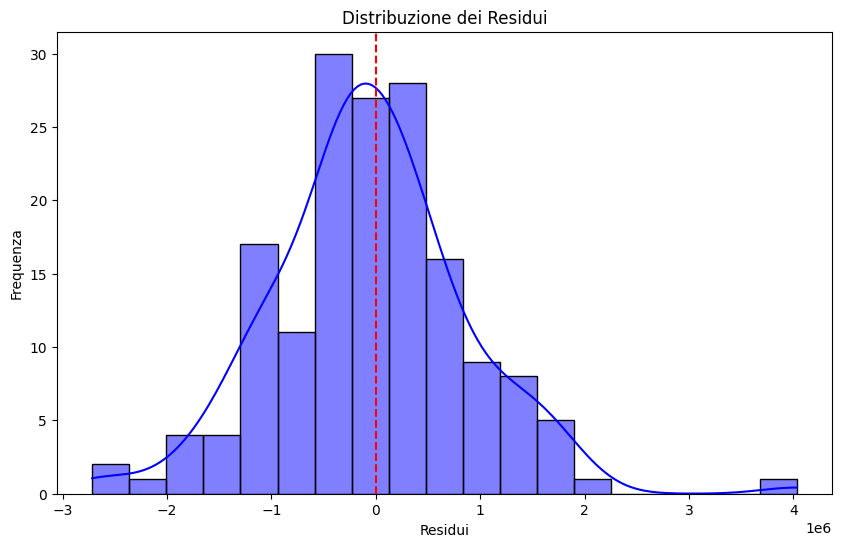

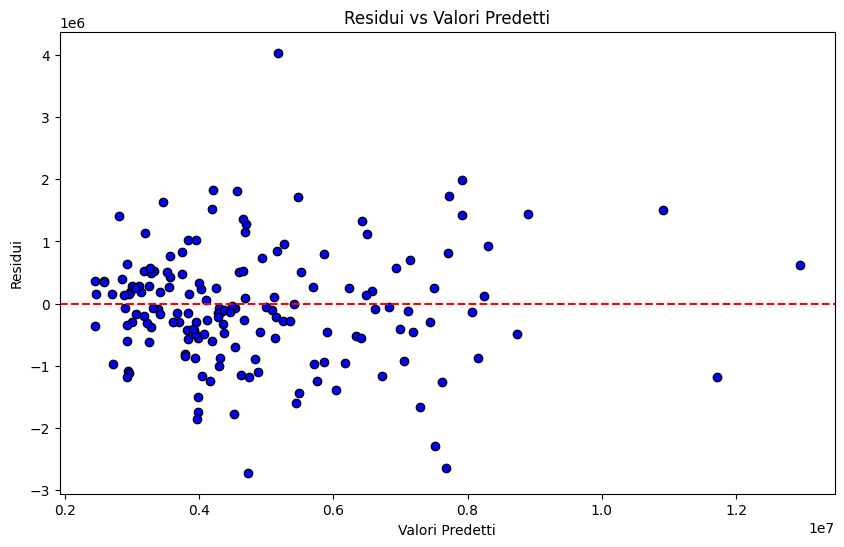

In [ ]:
y_test_pred=model.predict(X_test_scaled)

draw_residual(ridge_residuals,y_test_pred)

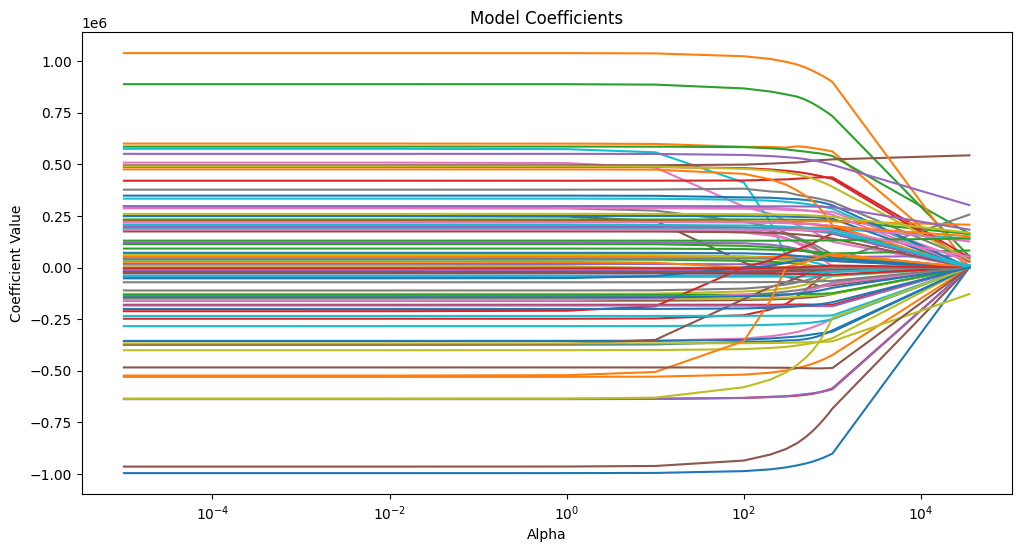

In [ ]:
draw_coef(lasso_coefs)

#### ELASTIC NET

In [ ]:
# ELASTIC NET
model=ElasticNet(
    alpha=best_alpha_elastic,
    l1_ratio=best_l1_elastic
  )
scores=compute_cross_validation(model,X,y)

In [ ]:
scores["train_score"].mean()

0.7127058995813766

**Risultati Train**

Polynomial(2), No Scaling <br>
0.7167032938853872 <br>

Polynomial(2), Std <br>
0.7127058995813766 <br>

Polynomial(2), Std, Removing Features <br>
0.6999908927826042 <br>

In [ ]:
scores["test_score"].mean()

0.6699773216767133

**Risultati Test**

Polynomial(2), No Scaling <br>
0.6605457058811685 <br>

Polynomial(2), Std <br>
0.6699773216767133 <br>

Polynomial(2), Std, Removing Features <br>
0.6646492149059549 <br>

In [ ]:
#compute_and_draw_learning_curve(model)

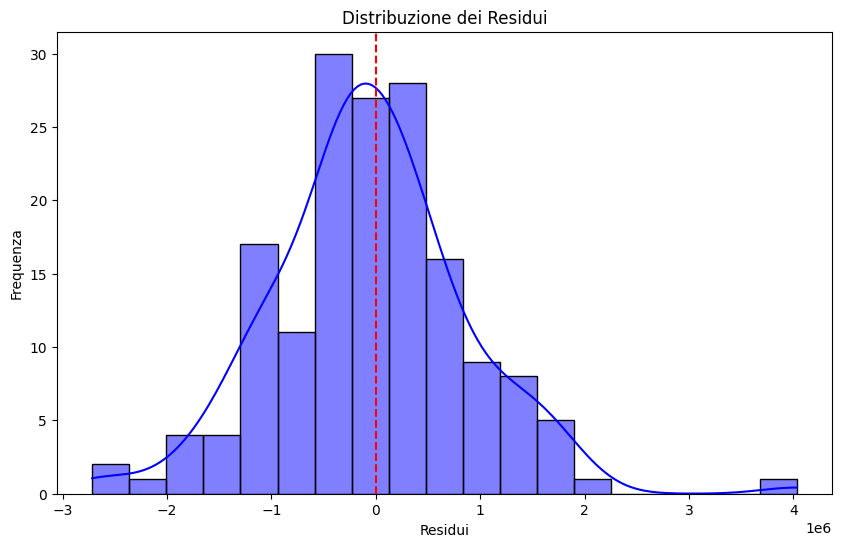

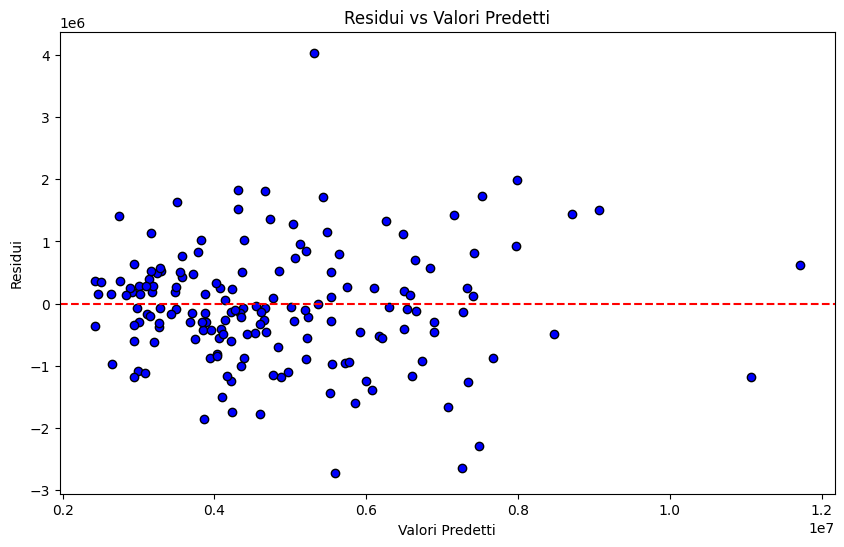

In [ ]:
y_test_pred=model.predict(X_test_scaled)

draw_residual(ridge_residuals,y_test_pred)